In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('SampleSuperstore.csv',sep=';')
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Questions
1- Which shipment mode brings the most profits?
2- Which category sells the most quantities?
3- Which subcategory sold the most quantity?
4- Which region should we supply with more products?
5- Which region should we increase the publicity in to improve sales?
6- What is the most popular 5 orders?
7- Does the quantity of purchases get affected by the percentage of discount?

In [22]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [23]:
print(df.shape)
# Drop the 'county_name' and 'state' columns because it only contains missing values.
df.drop(['Segment', 'Postal Code'], axis='columns', inplace=True)
print(df.shape)

(9994, 12)
(9994, 10)


In [24]:
df.dtypes

Ship Mode        object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [26]:
df[['Ship Mode','Category','Region']]=df[['Ship Mode','Category','Region']].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Ship Mode     9994 non-null   category
 1   City          9994 non-null   object  
 2   State         9994 non-null   object  
 3   Region        9994 non-null   category
 4   Category      9994 non-null   category
 5   Sub-Category  9994 non-null   object  
 6   Sales         9994 non-null   float64 
 7   Quantity      9994 non-null   int64   
 8   Discount      9994 non-null   float64 
 9   Profit        9994 non-null   float64 
dtypes: category(3), float64(3), int64(1), object(3)
memory usage: 576.5+ KB


In [28]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


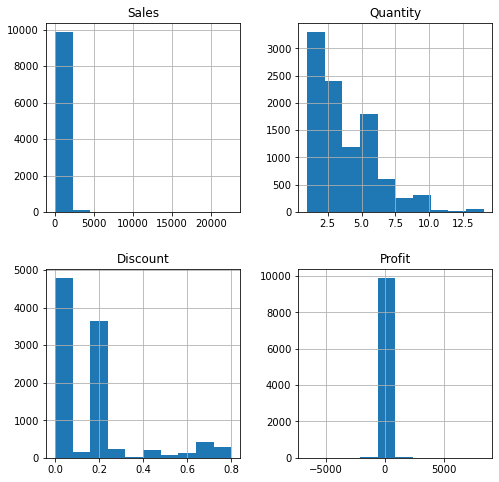

In [29]:
df.hist(figsize=(8,8));

### Which shipment mode brings the most profits?

<AxesSubplot:xlabel='Ship Mode'>

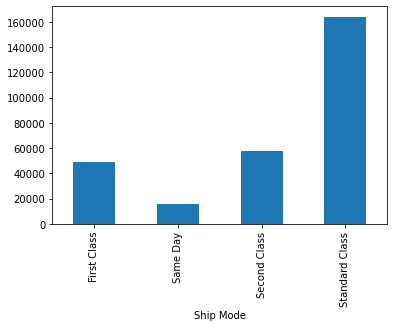

In [31]:
df.groupby('Ship Mode')['Profit'].sum().plot(kind='bar')

### Which category sells the most quantities?

<AxesSubplot:xlabel='Category'>

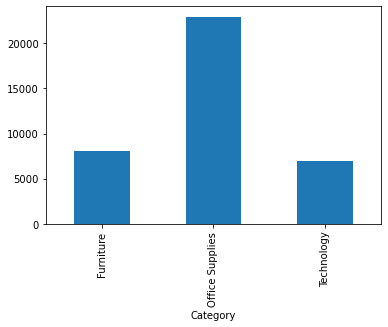

In [32]:
df.groupby('Category')['Quantity'].sum().plot(kind='bar')

### Which region should we supply with more products?

<AxesSubplot:xlabel='Region'>

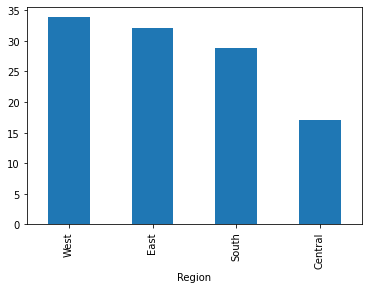

In [45]:
df.groupby('Region')['Profit'].mean().sort_values(ascending=False).plot(kind='bar')

### Which region should we increase the publicity in to improve sales?

<AxesSubplot:ylabel='Quantity'>

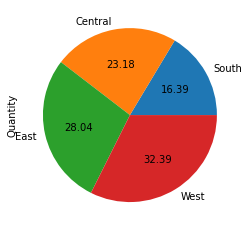

In [50]:
df.groupby('Region')['Quantity'].sum().sort_values().plot(kind='pie',autopct='%.2f')

Looks like the south buys the least number of products, so we should increase publicity there! 

### What is the most popular 5 orders?

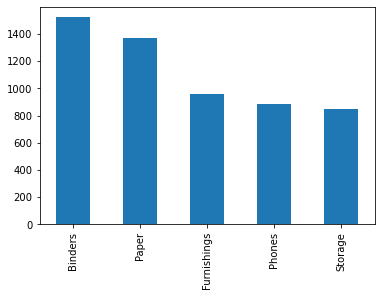

In [71]:
df2=df['Sub-Category'].value_counts(ascending=False)[:5]
df2.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Does the quantity of purchases get affected by the percentage of discount?

In [80]:
dff=df['Discount'].sort_values()
dff

0       0.0
5506    0.0
5501    0.0
5499    0.0
5498    0.0
       ... 
8716    0.8
7153    0.8
6530    0.8
4529    0.8
2346    0.8
Name: Discount, Length: 9994, dtype: float64

<AxesSubplot:xlabel='Discount'>

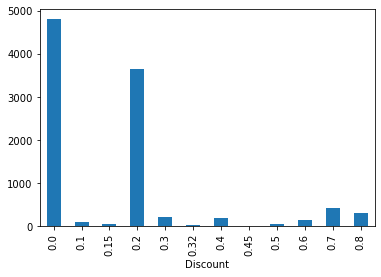

In [83]:
df.groupby(dff)['Quantity'].count().plot(kind='bar')

Looks like the most number of purchases happened at 20% discount and no discount, why is that?